<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).

> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


a)

In [9]:
import numpy as np

epsilon =  1e-15
#----funcion de activacion y gradiente
def sigmoid(x):
    if x > 0:
        x = np.maximum(epsilon, x) #si x es muy pequeño
    #if x < 0:
    #    x = np.maximum(-600,x)  #si x es muy negativo
    return 1 / (1 + np.exp(-x))
    
def gradient_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def softmax(x):
    retorno = np.zeros(len(x))
    suma =0.0
    for i in x:
        valor = np.maximum(epsilon,i)
        suma+=np.exp(valor)
    for i in range(len(x)):
        valor = np.maximum(epsilon,x[i])
        retorno[i] = np.exp(valor)/suma #salida normalizada
    return retorno
def gradient_softmax(x):
    return softmax(x)*(1-softmax(x))

#---funcion de perdida y gradiente
def loss_function(y, ypred):
    #binary
    ypred = np.maximum(epsilon, ypred)
    
    #error cuadratico
    #return np.pow(y-ypred,2)/2
    
    #binary cross entropy
    return -1.0*(y*np.log(ypred) + np.subtract(1,y)*np.log(np.subtract(1,ypred)))
    
def gradient_loss_function(y,ypred):
    #binary
    ypred = np.maximum(epsilon, ypred)
    
    #error cuadratico
    #return y-ypred
    
    #binary cross entropy
    return -1.0* ( y-ypred)/(ypred*np.subtract(1,ypred))

    
def init_network(n_input, hidden_neurons, n_output, L):
    S = [n_input] + hidden_neurons + [n_output]
    
    #inicializan matrices de salidas de neuronas
    A = []
    A_derivate = [] 
    #inicializa matrices que guardan los errores
    error_outputs = []
    error_weights = []
    #inicializa pesos de la red
    network_weights = []
    
    for l in range(L):
        A.append(np.zeros(S[l])) #salida de capa l
        A_derivate.append(np.zeros(S[l]))       #salida derivada de capa l
        error_outputs.append(np.zeros(S[l]))
        
    for l in range(L-1):
        error_weights.append(np.zeros((S[l],S[l+1])))
        network_weights.append(np.random.rand(S[l],S[l+1]))
        
    return S, network_weights, error_weights, error_outputs, A, A_derivate

  
class neural_network:
    
    def __init__(self, layers):
        self.n_layers = len(layers)
        self.n_input = layers[0]
        self.n_output = layers[-1]
        self.n_hidden = layers[1:-1]
        
        self.L = 2 + len(self.n_hidden)  #numero de capas
        
        # create architecture
        self.S, self.weights, self.e_weights, self.e_output, self.neuron, self.neuron_gradient = init_network(self.n_input,
                                                                                self.n_hidden, self.n_output, self.L)
        
        
    #i) calcular forward pass, predicción de la red, actualizan las salidas
    def forward_pass(self, example):
        x = example[0]
        y = example[1]
        self.neuron[0] = x.copy()
        for l in range(self.L-1): #por cada transicion entre capas {0,L-2}          
            for s in range(self.S[l+1]): #por cada neurona de la capa siguiente
                aux = np.dot(self.weights[l][:,s], self.neuron[l])
                self.neuron[l+1][s] = sigmoid(aux)
                self.neuron_gradient[l+1][s] = gradient_sigmoid(aux)
        #ultima capa softmax
        self.neuron[self.L-1] = softmax(self.neuron[self.L-1])  #prediccion
        self.neuron_gradient[self.L-1] = gradient_softmax(self.neuron[self.L-1])
    
    
    #ii) calcular backward pass, modifica la red considerando el error observado
    def backward_pass(self, example, learning_rate):
        x = example[0]
        y = example[1]
        
        #calcula el error en la ultima capa
        for s in range(self.S[self.L-1]): 
            #arquitectura con multiples salidas (y es un vector)
            ypred = self.neuron[self.L-1]  #.copy()
            self.e_output[self.L-1][s] = gradient_loss_function(y[s], ypred[s])
            self.e_weights[self.L-2][:,s] = np.dot(self.e_output[self.L-1][s], np.dot(self.neuron_gradient[self.L-1][s], 
                                                                                      self.neuron[self.L-2]))

            #actualizar pesos en vector
            self.weights[self.L-2][:,s] = self.weights[self.L-2][:,s] - learning_rate*self.e_weights[self.L-2][:,s]
        #calcula el error recursivamente
        for l in np.arange(self.L-2,0,-1): #desde la penultima capa hasta la segunda {L-2,1}
            for s in range(self.S[l]): #para cada neurona en la capa l
                self.e_output[l][s] = np.sum(self.e_output[l+1])
                self.e_weights[l-1][:,s] =  np.dot( self.e_output[l][s], np.dot( self.neuron_gradient[l][s], 
                                                                                self.neuron[l-1]) )

                #actualizar pesos en vector
                self.weights[l-1][:,s] = self.weights[l-1][:,s] - learning_rate*self.e_weights[l-1][:,s]
            


    #iii) estrategia principal de entrenamiento
    def train(self, X, Y, epoch, learning_rate):
        data = list(zip(X, Y)) 
       # np.random.shuffle(data)  #desordenar los ejemplos
        
        loss_epochs = []
        error_epochs = []
        for i in range(epoch):
            loss = []
            error =[]
            #print(i)
            #print(len(list(data)))
            for example in data: #con sgd un ejemplo a la vez
                self.forward_pass(example)
                #measure_error(network, example)
                
                #medir el error y loss
                ypred = self.neuron[self.L-1].copy()
                #print("example")
                #print(example[1])
                #print(ypred)
                loss.append(loss_function(example[1], ypred))
                error.append( 1 - example[1][np.argmax(ypred)] )
                
                self.backward_pass(example, learning_rate)
            
            #print(loss)
            loss_epochs.append(np.mean(loss))
            error_epochs.append(np.mean(error))
            #print("loss " + str(loss_epochs[-1]))
            
        return loss_epochs, error_epochs
        

n_inputs = 10
info = [n_inputs, 32, 16, 3]
nn = neural_network(info)

b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente numpy. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de  ntnt  ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

In [10]:
#FF  = red ya entrenada
def predecir(X_test,y_test,FF):
    n_test = len(y_test)
    print("numero de ejemplos: " + n_test)
    
    predicciones = []
    for xi,yi in zip(X_test,y_test): #para n_test ejemplos
        y_hat = forward_pass(xi,yi,FF.L,FF.WM, FF.A,FF.A_der,FF.S)
        predicciones.append(y_hat)
    return predicciones

c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset iris, disponible a través de la librería sklearn, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (loss) entre categorical cross entropy y mean squared error, además de variar las funciones de activación para las 2 capas ocultas entre ReLU (Rectifier Linear Unit) y la función logística (sigmoid). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando one hot vectors.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import keras

X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#transform target to one hot vector
y_onehot = keras.utils.to_categorical(y_train)

In [12]:
print(X_train)
print(y_train)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [13]:
import time

layers = [X_train.shape[1], 32, 16, 3]

start_time = time.time()
FF = neural_network(layers)

loss, error = FF.train(X_train, y_onehot, epoch = 100, learning_rate = 0.5)
print("-- training time: %s --" % (time.time() - start_time))

-- training time: 0.0009865760803222656 --


In [7]:
print(loss)

[0.5006007738856337, 0.593206793076393, 0.5945196241600418, 0.5924475051921665, 0.5903030194532488, 0.5880017948642834, 0.5873974796543497, 0.587360341009201, 0.5867292407071475, 0.5867781903299379, 0.5876554039747783, 0.5871916989502743, 0.5865590606563768, 0.5857635920427264, 0.585771615592495, 0.585412250169447, 0.5851159158440677, 0.5849347058940991, 0.5849587877459914, 0.5860515036258147, 0.5871263319711169, 0.5889073340326503, 0.5896973056964586, 0.589671692160171, 0.5903208131386204, 0.5908160160401188, 0.5914586184280443, 0.5914285654194484, 0.5928417549663247, 0.5914683013909697, 0.5911858770348766, 0.5867470060283152, 0.5828606503279937, 0.5812782801176744, 0.5822225104441341, 0.5825435248262514, 0.5822271048679918, 0.5830762717809262, 0.582775160248304, 0.582911923906055, 0.582663116998053, 0.5826277698293235, 0.5823581366791118, 0.5832636659406825, 0.583712947043138, 0.5831765103294879, 0.5825213054520267, 0.5829057520677606, 0.5821890587244495, 0.5819398982885617, 0.581582

In [8]:
print(error)

[0.31333333333333335, 0.4866666666666667, 0.4866666666666667, 0.47333333333333333, 0.47333333333333333, 0.4666666666666667, 0.47333333333333333, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.4533333333333333, 0.46, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.47333333333333333, 0.4666666666666667, 0.4666666666666667, 0.47333333333333333, 0.47333333333333333, 0.47333333333333333, 0.47333333333333333, 0.47333333333333333, 0.4666666666666667, 0.47333333333333333, 0.4533333333333333, 0.44666666666666666, 0.44666666666666666, 0.44666666666666666, 0.44666666666666666, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.44666666666666666, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.4533333333333333, 0.44666666666666666, 0.44666666666666666, 0.44666666666666666, 0.4466666666666666

<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

In [4]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
start_time = time.time()

history = model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time: %s --" % (time.time() - start_time))
error = list(map(lambda x: 1 - x, history.history['acc']))
loss = history.history['loss']

-- training time: 33.956398010253906 --


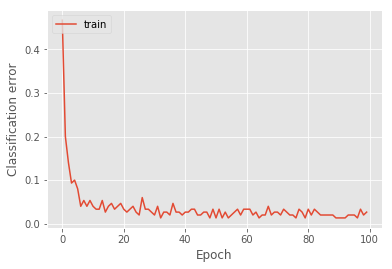

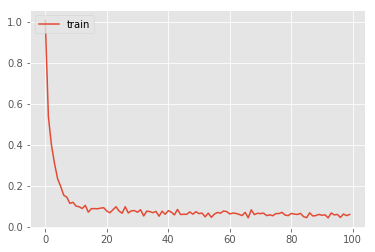

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(error, label='Acc')
#plt.title('')
plt.ylabel('Classification error')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(loss, label='Acc')
#plt.title('')
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()